In this notebook, we will build a model to study the nature of volatility in the case of US government bond yields.

In [1]:
# Load the packages
library(viridisLite)
library(viridis)
library(xts)
library(readr)

# Load the data
yc_raw <- read_csv("datasets/FED-SVENY.csv")

# Convert the data into xts format
yc_all <- as.xts(x = yc_raw[, -1], order.by = yc_raw$Date)

# Show only the 1st, 5th, 10th, 20th and 30th columns
yc_all_tail <- tail(yc_all[, c(1, 5, 10, 20, 30)])
yc_all_tail

Warning message:
"package 'viridisLite' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = "")
)
See spec(...) for full column specifications.


           SVENY01 SVENY05 SVENY10 SVENY20 SVENY30
2019-03-22  2.4222  2.2613  2.4553  2.7661  3.0178
2019-03-25  2.3901  2.2281  2.4449  2.7610  3.0216
2019-03-26  2.3811  2.2016  2.4249  2.7508  3.0138
2019-03-27  2.3560  2.1931  2.4020  2.7092  2.9785
2019-03-28  2.3601  2.2137  2.4058  2.6907  2.9605
2019-03-29  2.3719  2.2398  2.4143  2.6939  2.9538

In the output table above, we see the yields for some maturities.

These data include the whole yield curve. The yield of a bond is the price of the money lent. The higher the yield, the more money you receive on your investment. The yield curve has many maturities; in this case, it ranges from 1 year to 30 years. Different maturities have different yields, but yields of neighboring maturities are relatively close to each other and also move together.

Let's visualize the yields over time. We will see that the long yields (e.g. SVENY30) tend to be more stable in the long term, while the short yields (e.g. SVENY01) vary a lot. 

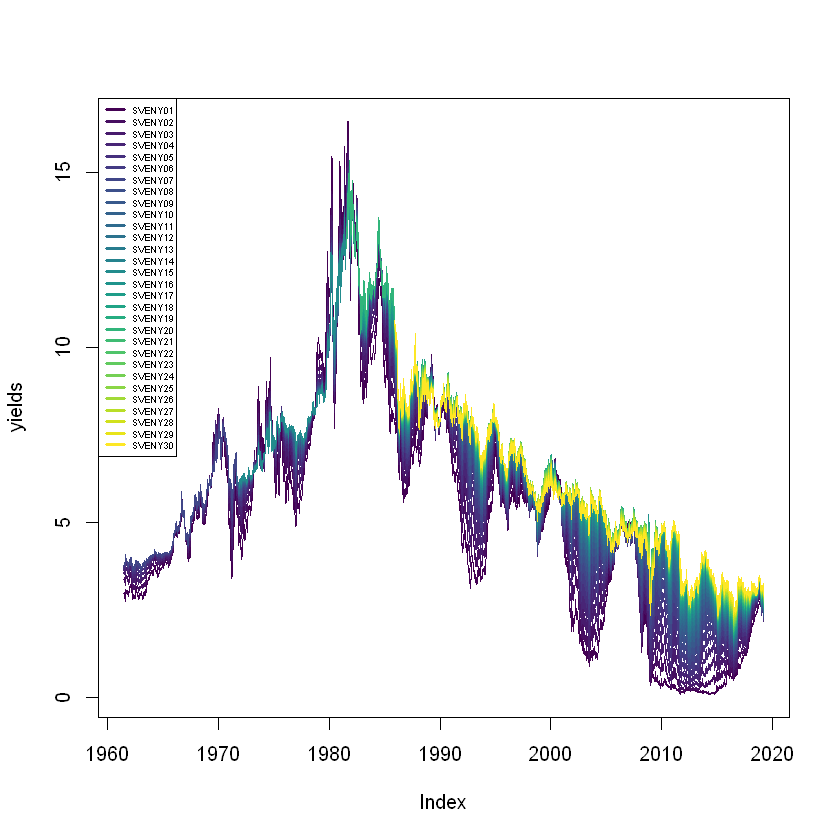

In [5]:
library(viridis)

# Define plot arguments
yields  <- yc_all
plot.type  <- "single"
plot.palette <- viridis(30)
asset.names <- colnames(yc_all)

# Plot the time series
plot.zoo(x = yields, plot.type = plot.type, col = plot.palette)

# Add the legend
legend(x = "topleft", legend = asset.names,
       col = plot.palette, cex = 0.45, lwd = 3)

We see the level of bond yields for some maturities, but to understand how volatility evolves we have to examine the changes in the time series. Currently, we have yield levels; we need to calculate the changes in the yield levels. This is called "differentiation" in time series analysis. Differentiation has the added benefit of making a time series independent of time.

In [7]:
# Differentiate the time series  
ycc_all <- diff.xts(yc_all)

# Show the tail of the 1st, 5th, 10th, 20th and 30th columns
ycc_all_tail <- tail(ycc_all[, c(1, 5, 10, 20, 30)])
ycc_all_tail

           SVENY01 SVENY05 SVENY10 SVENY20 SVENY30
2019-03-22 -0.0412 -0.1039 -0.0878 -0.0924 -0.0864
2019-03-25 -0.0321 -0.0332 -0.0104 -0.0051  0.0038
2019-03-26 -0.0090 -0.0265 -0.0200 -0.0102 -0.0078
2019-03-27 -0.0251 -0.0085 -0.0229 -0.0416 -0.0353
2019-03-28  0.0041  0.0206  0.0038 -0.0185 -0.0180
2019-03-29  0.0118  0.0261  0.0085  0.0032 -0.0067

Now that we have a time series of the changes in US government yields let's examine it visually.

By taking a look at the time series from the previous plots, we see hints that the returns following each other have some unique properties:

The direction (positive or negative) of a return is mostly independent of the previous day's return. In other words, you don't know if the next day's return will be positive or negative just by looking at the time series.
The magnitude of the return is similar to the previous day's return. That means, if markets are calm today, we expect the same tomorrow. However, in a volatile market (crisis), you should expect a similarly turbulent tomorrow.

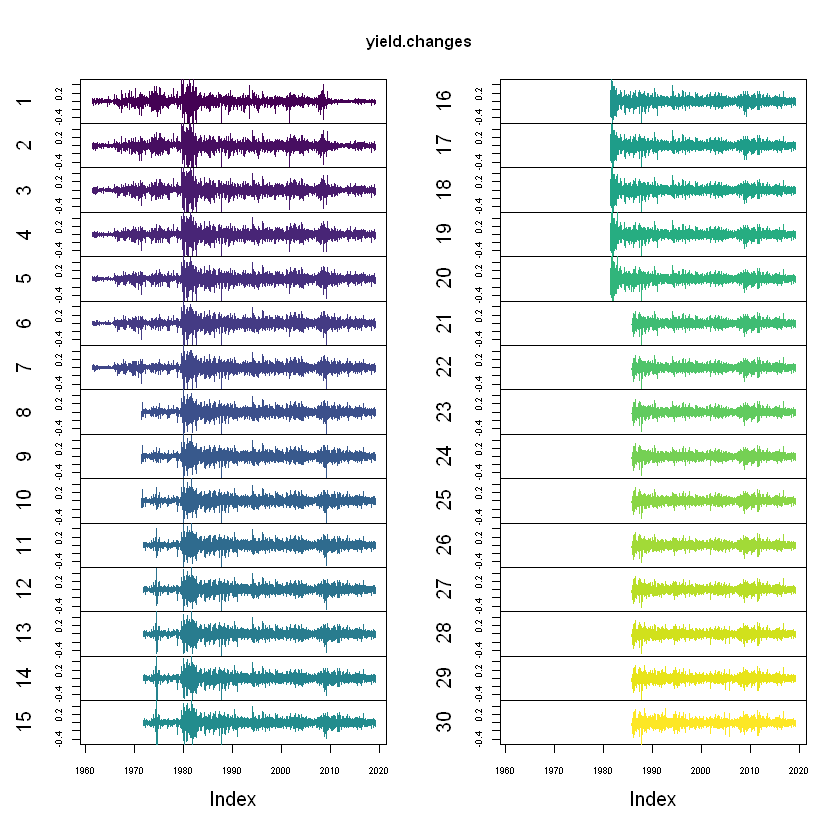

In [9]:
# Define the plot parameters
yield.changes <- ycc_all
plot.type <- "multiple"


# Plot the differtianted time series
plot.zoo(x = yield.changes, plot.type = plot.type, 
     ylim = c(-0.5, 0.5), cex.axis = 0.7, 
     ylab = 1:30, col = plot.palette)

The statistical properties visualized earlier can be measured by analytical tools. The simplest method is to test for autocorrelation. Autocorrelation measures how a datapoint's past determines the future of a time series.

If the autocorrelation is close to 1, the next day's value will be very close to today's value.
If the autocorrelation is close to 0, the next day's value will be unaffected by today's value.
Because we are interested in the recent evolution of bond yields, we will filter the time series for data from 2000 onward.

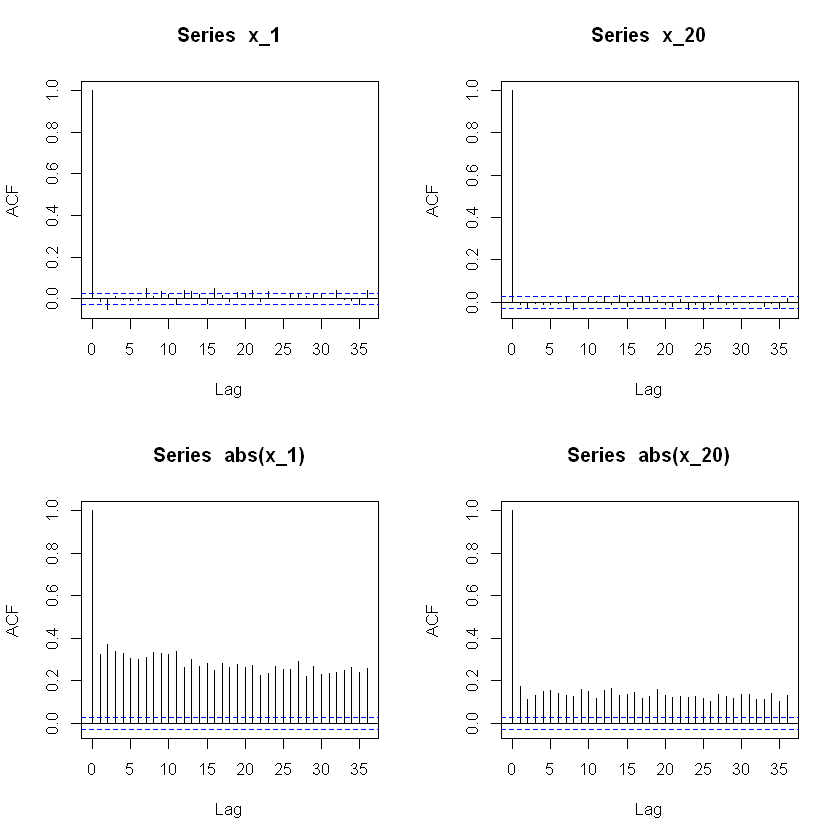

In [10]:
# Filter for changes in and after 2000
ycc <- ycc_all["2000/", ]

# Save the 1-year and 20-year maturity yield changes into separate variables
x_1 <- ycc[, "SVENY01"]
x_20 <- ycc[, "SVENY20"]

# Plot the autocorrelations of the yield changes
par(mfrow=c(2,2))
acf_1 <- acf(x_1)
acf_20 <- acf(x_20)

# Plot the autocorrelations of the absolute changes of yields
acf_abs_1 <- acf(abs(x_1))
acf_abs_20 <- acf(abs(x_20))